## 最小頂点被覆問題
グラフ$G$に対して、$G$の頂点の部分集合$R$であって、$G$のどの辺についても少なくともどちらかの端点が$R$に含まれているようなものを$G$の<b>頂点被覆</b>という。
$G$の頂点被覆のうち要素数が最小のっものを求める問題を<b>最小頂点被覆問題</b>という。

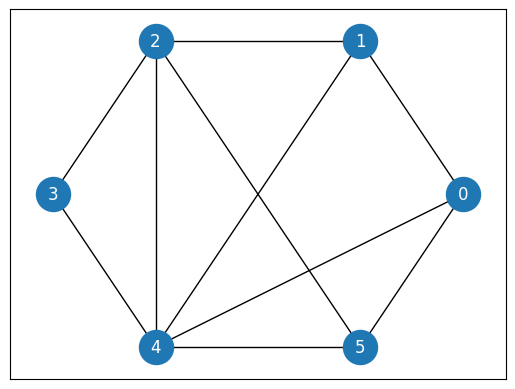

In [1]:
import networkx as nx
    
N = 6  # グラフの頂点数
G = nx.Graph()
G.add_nodes_from(range(N))
edge_list = [
    (0, 1),
    (0, 4),
    (0, 5),
    (1, 2),
    (1, 4),
    (2, 3),
    (2, 4),
    (2, 5),
    (3, 4),
    (4, 5),
]
    
G.add_edges_from(edge_list)
    
pos = nx.circular_layout(G)
    
# 作成したグラフの描画
nx.draw_networkx(G, node_size=600, font_color="w", pos=pos)

## 定式化
### 決定変数
$q_i \in \{ 0, 1 \} \, (i=0,\ldots,N-1)$ ：頂点 $i$ が頂点被覆$R$に含まれていたら$1$、そうでなければ$0$。

### 制約関数
$q$が頂点被覆に含まれるためには以下が必要。
- $G$の各辺 $(u,v)$ について、$u$または$v$のどちらかが$R$に含まれる。

これは $q_u$と$q_v$のどちらかが 1 であるという条件で、以下で表せる。
$$
    (1- q_u) (1- q_v) = 0 \;\; \text{for} \;\; (u,v) \in E
$$

### 目的関数
$R$ の要素数ができるだけ少なければよい。
$$
    \sum_{i=0}^{N-1} q_i
$$

In [2]:
# 決定変数
from amplify import VariableGenerator
    
gen = VariableGenerator()
q = gen.array("Binary", N)

# 制約関数
from amplify import equal_to, sum as amplify_sum
    
constraints = amplify_sum(equal_to((1 - q[u]) * (1 - q[v]), 0) for u, v in G.edges)

# コスト関数
cost = q.sum()

# モデル
model = cost + constraints

In [3]:
from amplify import FixstarsClient, solve
from datetime import timedelta
    
client = FixstarsClient()
client.token = "AE/ar62PjutSqmuoEa8bvfyrEmjE1rCpOqE"
client.parameters.timeout = timedelta(milliseconds=1000)  # タイムアウトは 1000 ms
    
# 求解を実行
result = solve(model, client)
    
if len(result) == 0:
    print("頂点被覆が見つかりませんでした。")
else:
    print("頂点被覆が見つかりました。")

頂点被覆が見つかりました。


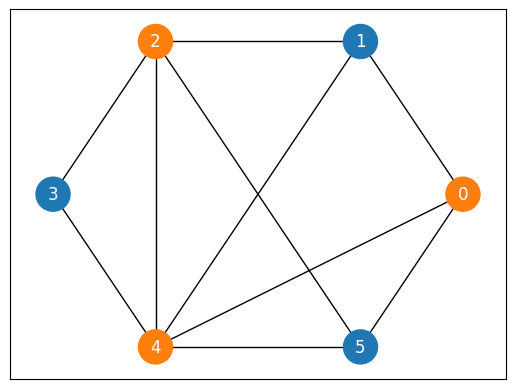

In [4]:
values = q.evaluate(result.best.values)
colors = ["C1" if value == 1 else "C0" for value in values]
    
nx.draw_networkx(G, node_size=600, font_color="w", node_color=colors, pos=pos)